In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('imputed_file.csv')
df.head()

,Unnamed: 0,date,Дата_x,Посока,Рег. номер,Държава,Скорост,Клас,Лента,Дължина,...,Средна скорост на вятър в m/s,Средна посока на вятър в °,Темп. на повърхността на настилката в °C,Точка на замръзване в °C,Състояние на повърхността,Предупреждение за състояние на повърхността,Височина на водния стълб в µm,Темп. под повърхн. на дълб. 5 см в °C,Макс. скорост на вятър в m/s,Посока на вятъра при макс. скорост в °
0,0,2023-03-29 12:00:00,29.3.2023 г. 12:00:06,Околовръстно,-6295152506763664080,BG,56.0,1.0,L6,2168.0,...,4.6,326.0,14.3,0.0,DR,-,0.0,11.2,8.7,3.0
1,1,2023-03-29 12:00:00,29.3.2023 г. 12:00:07,Център,140823469443,BG,50.0,0.0,L2,2200.0,...,4.6,326.0,14.3,0.0,DR,-,0.0,11.2,8.7,3.0
2,2,2023-03-29 12:00:00,29.3.2023 г. 12:00:08,Околовръстно,140823469443,BG,43.0,1.0,L5,3400.0,...,4.6,326.0,14.3,0.0,DR,-,0.0,11.2,8.7,3.0
3,3,2023-03-29 12:00:00,29.3.2023 г. 12:00:10,Околовръстно,140823469443,BG,50.0,1.0,L5,9947.0,...,4.6,326.0,14.3,0.0,DR,-,0.0,11.2,8.7,3.0
4,4,2023-03-29 12:00:00,29.3.2023 г. 12:00:11,Околовръстно,140823469443,BG,48.0,1.0,L6,3600.0,...,4.6,326.0,14.3,0.0,DR,-,0.0,11.2,8.7,3.0


In [3]:
selected_columns = ['Скорост', 'Дължина']
data_file = df[selected_columns] 
data_file.head()

,Скорост,Дължина
0,56.0,2168.0
1,50.0,2200.0
2,43.0,3400.0
3,50.0,9947.0
4,48.0,3600.0


In [4]:
from sklearn.preprocessing import StandardScaler
numeric_columns = df.select_dtypes(include=['number']).columns
scaler = StandardScaler()
data_file[numeric_columns] = scaler.fit_transform(df[numeric_columns])
data_file.head()


,Скорост,Дължина,Unnamed: 0,Рег. номер,Клас,Тегло,Температура в °C,Точка на оросяване в °C,Относителна влажност в %,Интензивност на валеж в mm/h,Видимост в m,Средна скорост на вятър в m/s,Средна посока на вятър в °,Темп. на повърхността на настилката в °C,Точка на замръзване в °C,Височина на водния стълб в µm,Темп. под повърхн. на дълб. 5 см в °C,Макс. скорост на вятър в m/s,Посока на вятъра при макс. скорост в °
0,0.719139,-0.889057,-1.732049,-1.610795,-0.287482,-0.275325,-0.711492,-2.367559,-1.284103,-0.032641,0.03949,1.904854,1.168243,0.143919,0.0,-0.092572,0.103138,1.711721,-1.955508
1,0.256977,-0.873849,-1.732044,0.001554,-1.151210,-0.555328,-0.711492,-2.367559,-1.284103,-0.032641,0.03949,1.904854,1.168243,0.143919,0.0,-0.092572,0.103138,1.711721,-1.955508
2,-0.282211,-0.303564,-1.732040,0.001554,-0.287482,-0.300168,-0.711492,-2.367559,-1.284103,-0.032641,0.03949,1.904854,1.168243,0.143919,0.0,-0.092572,0.103138,1.711721,-1.955508
3,0.256977,2.807814,-1.732035,0.001554,-0.287482,-0.094461,-0.711492,-2.367559,-1.284103,-0.032641,0.03949,1.904854,1.168243,0.143919,0.0,-0.092572,0.103138,1.711721,-1.955508
4,0.102924,-0.208517,-1.732031,0.001554,-0.287482,-0.227962,-0.711492,-2.367559,-1.284103,-0.032641,0.03949,1.904854,1.168243,0.143919,0.0,-0.092572,0.103138,1.711721,-1.955508


In [5]:
missing_values = data_file.isnull().sum()
print(missing_values)

Скорост                                     0
Дължина                                     0
Unnamed: 0                                  0
Рег. номер                                  0
Клас                                        0
Тегло                                       0
Температура в °C                            0
Точка на оросяване в °C                     0
Относителна влажност в %                    0
Интензивност на валеж в mm/h                0
Видимост в m                                0
Средна скорост на вятър в m/s               0
Средна посока на вятър в °                  0
Темп. на повърхността на настилката в °C    0
Точка на замръзване в °C                    0
Височина на водния стълб в µm               0
Темп. под повърхн. на дълб. 5 см в °C       0
Макс. скорост на вятър в m/s                0
Посока на вятъра при макс. скорост в °      0
dtype: int64


In [6]:
data_file = df.replace(0, np.nan)
data_file.to_csv('NaN.csv', index=True)
df3 = pd.read_csv('NaN.csv')

In [7]:
missing_values = df3.isnull().sum()
print(missing_values)

Unnamed: 0.1                                        0
Unnamed: 0                                          1
date                                                0
Дата_x                                              0
Посока                                              0
Рег. номер                                          0
Държава                                             0
Скорост                                           470
Клас                                            11641
Лента                                               0
Дължина                                          7621
Тегло                                           28540
Станция                                             0
Дата_y                                              0
Температура в °C                                  347
Точка на оросяване в °C                          4655
Относителна влажност в %                            0
Интензивност на валеж в mm/h                   769645
Видимост в m                

In [8]:
df3.head()

,Unnamed: 0.1,Unnamed: 0,date,Дата_x,Посока,Рег. номер,Държава,Скорост,Клас,Лента,...,Средна скорост на вятър в m/s,Средна посока на вятър в °,Темп. на повърхността на настилката в °C,Точка на замръзване в °C,Състояние на повърхността,Предупреждение за състояние на повърхността,Височина на водния стълб в µm,Темп. под повърхн. на дълб. 5 см в °C,Макс. скорост на вятър в m/s,Посока на вятъра при макс. скорост в °
0,0,NaN,2023-03-29 12:00:00,29.3.2023 г. 12:00:06,Околовръстно,-6295152506763664080,BG,56.0,1.0,L6,...,4.6,326.0,14.3,NaN,DR,-,NaN,11.2,8.7,3.0
1,1,1.0,2023-03-29 12:00:00,29.3.2023 г. 12:00:07,Център,140823469443,BG,50.0,NaN,L2,...,4.6,326.0,14.3,NaN,DR,-,NaN,11.2,8.7,3.0
2,2,2.0,2023-03-29 12:00:00,29.3.2023 г. 12:00:08,Околовръстно,140823469443,BG,43.0,1.0,L5,...,4.6,326.0,14.3,NaN,DR,-,NaN,11.2,8.7,3.0
3,3,3.0,2023-03-29 12:00:00,29.3.2023 г. 12:00:10,Околовръстно,140823469443,BG,50.0,1.0,L5,...,4.6,326.0,14.3,NaN,DR,-,NaN,11.2,8.7,3.0
4,4,4.0,2023-03-29 12:00:00,29.3.2023 г. 12:00:11,Околовръстно,140823469443,BG,48.0,1.0,L6,...,4.6,326.0,14.3,NaN,DR,-,NaN,11.2,8.7,3.0


In [9]:
selected_columns = ['Скорост', 'Дължина']
data_selected = df3[selected_columns]
data_selected.head()

,Скорост,Дължина
0,56.0,2168.0
1,50.0,2200.0
2,43.0,3400.0
3,50.0,9947.0
4,48.0,3600.0


In [10]:
num = data_selected.isnull().sum()
print(num)

Скорост     470
Дължина    7621
dtype: int64


In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(data_selected), columns=data_selected.columns)
df_imputed.head()


,Скорост,Дължина
0,56.0,2168.0
1,50.0,2200.0
2,43.0,3400.0
3,50.0,9947.0
4,48.0,3600.0


In [12]:
num = df_imputed.isnull().sum()
print(num)

Скорост    0
Дължина    0
dtype: int64


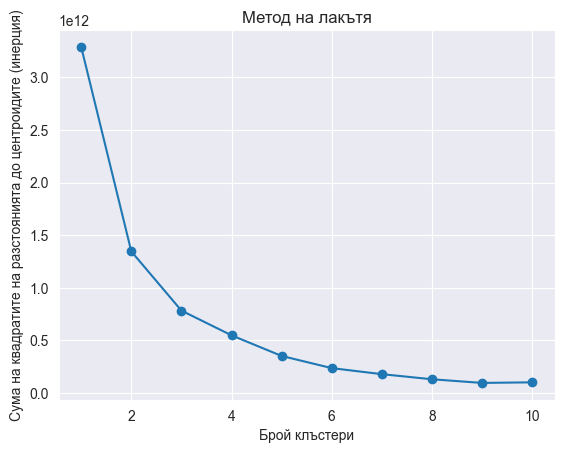

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Примерни данни

X = df_imputed

# Създаване на списък, в който ще съхраним стойности на вариацията за всяко k
variations = []

# Ползване k от 1 до 10 
for k in range(1, 11):
    # Създаване на k-means модел с k кластера
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    
    # Записване на вариацията за текущото k
    variations.append(kmeans.inertia_)

# Визуализация на метода на лакътя
plt.plot(range(1, 11), variations, marker='o')
plt.xlabel('Брой клъстери')
plt.ylabel('Сума на квадратите на разстоянията до центроидите (инерция)')
plt.title('Метод на лакътя')
plt.show()

In [14]:
from sklearn.ensemble import IsolationForest

# Създаване на модел за Isolation Forest
model = IsolationForest(contamination=0.1)  # contamination е долята на аномалиите в данните

# Подготовка на данните X, които съдържат вашите данни
model.fit(X)  # Трениране на модела
predictions = model.predict(X)  # Предсказване на аномалиите


cleaned_df = df_imputed[predictions == 1]  # Избиране на редовете, които не са маркирани като аномалии

# Запазване на промените в нов CSV файл
cleaned_df.to_csv('cleaned.csv', index=False)

In [15]:
n_clusters = 4
gmm = GaussianMixture(n_components=n_clusters)
gmm.fit(cleaned_df)

GaussianMixture(n_components=4)

In [16]:
labels = gmm.predict(cleaned_df)

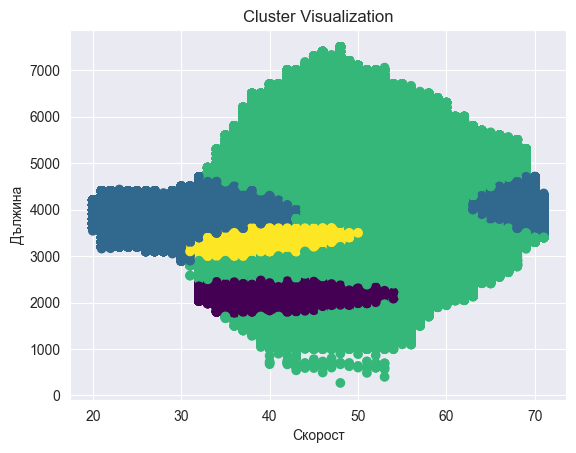

In [17]:
import matplotlib.pyplot as plt
plt.scatter(cleaned_df['Скорост'], cleaned_df['Дължина'], c=labels, cmap='viridis')
plt.xlabel('Скорост')
plt.ylabel('Дължина')
plt.title('Cluster Visualization')
plt.show() 